# Student Performance Predictor

### Setp 1 : Load Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
data_set = pd.read_csv('data-set.csv')

### Step 2 : Analyze Data

In [3]:
print(data_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Hours_Studied  19 non-null     float64
 1   Attendance     19 non-null     float64
 2   Past_Score     19 non-null     float64
 3   Sleep_Hours    19 non-null     float64
 4   Final_Score    20 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 932.0 bytes
None


In [4]:
print(data_set.describe())

       Hours_Studied  Attendance  Past_Score  Sleep_Hours  Final_Score
count      19.000000   19.000000   19.000000    19.000000    20.000000
mean        5.368421   77.631579   71.894737     6.315789    73.900000
std         1.382852   12.061005   10.208356     1.293257    12.173742
min         3.000000   55.000000   50.000000     4.000000    50.000000
25%         4.500000   70.000000   66.500000     5.500000    65.000000
50%         5.000000   80.000000   72.000000     6.000000    74.000000
75%         6.000000   85.000000   79.000000     7.000000    82.750000
max         8.000000  100.000000   90.000000     8.000000    95.000000


In [6]:
print(data_set.isnull().sum())

Hours_Studied    1
Attendance       1
Past_Score       1
Sleep_Hours      1
Final_Score      0
dtype: int64


In [16]:
print(data_set.head())

   Hours_Studied  Attendance  Past_Score  Sleep_Hours  Final_Score
0       5.000000   80.000000        70.0          7.0           75
1       6.000000   85.000000        72.0          6.0           78
2       5.368421   77.631579        68.0          5.0           70
3       4.000000   70.000000        65.0          6.0           65
4       7.000000   90.000000        80.0          8.0           85


### Step 3 : Handing Missing Values

In [19]:
data_set = data_set.fillna(data_set.mean())

In [20]:
print(data_set.isnull().sum())

Hours_Studied    0
Attendance       0
Past_Score       0
Sleep_Hours      0
Final_Score      0
dtype: int64


In [21]:
print(data_set)

    Hours_Studied  Attendance  Past_Score  Sleep_Hours  Final_Score
0        5.000000   80.000000   70.000000     7.000000           75
1        6.000000   85.000000   72.000000     6.000000           78
2        5.368421   77.631579   68.000000     5.000000           70
3        4.000000   70.000000   65.000000     6.000000           65
4        7.000000   90.000000   80.000000     8.000000           85
5        3.000000   60.000000   60.000000     4.000000           55
6        5.000000   75.000000   70.000000     7.000000           72
7        6.000000   80.000000   75.000000     6.315789           80
8        7.000000   95.000000   85.000000     8.000000           90
9        4.000000   65.000000   60.000000     6.000000           60
10       5.000000   70.000000   71.894737     5.000000           65
11       8.000000  100.000000   90.000000     8.000000           95
12       6.000000   85.000000   78.000000     7.000000           82
13       3.000000   55.000000   50.000000     4.

### Step : 4 Split Data

In [22]:
x = data_set[['Hours_Studied','Attendance','Past_Score','Sleep_Hours']]
y = data_set[['Final_Score']]

In [26]:
print(f"{x.head()}\n\n{y.head()}")

   Hours_Studied  Attendance  Past_Score  Sleep_Hours
0       5.000000   80.000000        70.0          7.0
1       6.000000   85.000000        72.0          6.0
2       5.368421   77.631579        68.0          5.0
3       4.000000   70.000000        65.0          6.0
4       7.000000   90.000000        80.0          8.0

   Final_Score
0           75
1           78
2           70
3           65
4           85


### Step 5 : Feature scaling

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [28]:
x = scaler.fit_transform(x)

In [31]:
x = pd.DataFrame(x)

In [33]:
print(x)

           0             1         2         3
0  -0.280832  2.069923e-01 -0.195646  0.557678
1   0.481427  6.439760e-01  0.010869 -0.257390
2   0.000000  1.241982e-15 -0.402162 -1.072458
3  -1.043092 -6.669752e-01 -0.711935 -0.257390
4   1.243687  1.080960e+00  0.836932  1.372746
5  -1.805352 -1.540943e+00 -1.228225 -1.887526
6  -0.280832 -2.299914e-01 -0.195646  0.557678
7   0.481427  2.069923e-01  0.320643  0.000000
8   1.243687  1.517943e+00  1.353221  1.372746
9  -1.043092 -1.103959e+00 -1.228225 -0.257390
10 -0.280832 -6.669752e-01  0.000000 -1.072458
11  2.005946  1.954927e+00  1.869510  1.372746
12  0.481427  6.439760e-01  0.630416  0.557678
13 -1.805352 -1.977926e+00 -2.260803 -1.887526
14 -0.280832 -2.299914e-01  0.010869 -0.257390
15 -1.043092 -1.103959e+00 -1.228225 -1.072458
16  0.481427  2.069923e-01  0.630416  0.557678
17  1.243687  6.439760e-01  0.836932  1.372746
18 -0.280832 -6.669752e-01 -0.402162 -0.257390
19  0.481427  1.080960e+00  1.353221  0.557678


### Step 6 : Train-test split

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42
)

### Step 7 : Choose regression model

In [41]:
from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(
    loss='squared_error', 
    penalty='elasticnet',
    alpha=0.01, 
    max_iter=1000, 
    random_state=42
)


### Step 8 : Train the Model

In [42]:
reg.fit(x_train, y_train)

d:\mine\Python\sklearn\.venv\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,"loss loss: str, default='squared_error'The loss function to be used. The possible values are 'squared_error','huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'The 'squared_error' refers to the ordinary least squares fit.'huber' modifies 'squared_error' to focus less on getting outlierscorrect by switching from squared to linear loss past a distance ofepsilon. 'epsilon_insensitive' ignores errors less than epsilon and islinear past that; this is the loss function used in SVR.'squared_epsilon_insensitive' is the same but becomes squared loss pasta tolerance of epsilon.More details about the losses formulas can be found in the:ref:`User Guide `.",'squared_error'
,"penalty penalty: {'l2', 'l1', 'elasticnet', None}, default='l2'The penalty (aka regularization term) to be used. Defaults to 'l2'which is the standard regularizer for linear SVM models. 'l1' and'elasticnet' might bring sparsity to the model (feature selection)not achievable with 'l2'. No penalty is added when set to `None`.You can see a visualisation of the penalties in:ref:`sphx_glr_auto_examples_linear_model_plot_sgd_penalties.py`.",'elasticnet'
,"alpha alpha: float, default=0.0001Constant that multiplies the regularization term. The higher thevalue, the stronger the regularization. Also used to compute thelearning rate when `learning_rate` is set to 'optimal'.Values must be in the range `[0.0, inf)`.",0.01
,"l1_ratio l1_ratio: float, default=0.15The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1.l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1.Only used if `penalty` is 'elasticnet'.Values must be in the range `[0.0, 1.0]` or can be `None` if`penalty` is not `elasticnet`... versionchanged:: 1.7 `l1_ratio` can be `None` when `penalty` is not ""elasticnet"".",0.15
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If False, thedata is assumed to be already centered.",True
,"max_iter max_iter: int, default=1000The maximum number of passes over the training data (aka epochs).It only impacts the behavior in the ``fit`` method, and not the:meth:`partial_fit` method.Values must be in the range `[1, inf)`... versionadded:: 0.19",1000
,"tol tol: float or None, default=1e-3The stopping criterion. If it is not None, training will stopwhen (loss > best_loss - tol) for ``n_iter_no_change`` consecutiveepochs.Convergence is checked against the training loss or thevalidation loss depending on the `early_stopping` parameter.Values must be in the range `[0.0, inf)`... versionadded:: 0.19",0.001
,"shuffle shuffle: bool, default=TrueWhether or not the training data should be shuffled after each epoch.",True
,"verbose verbose: int, default=0The verbosity level.Values must be in the range `[0, inf)`.",0
,"epsilon epsilon: float, default=0.1Epsilon in the epsilon-insensitive loss functions; only if `loss` is'huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'.For 'huber', determines the threshold at which it becomes lessimportant to get the prediction exactly right.For epsilon-insensitive, any differences between the current predictionand the correct label are ignored if they are less than this threshold.Values must be in the range `[0.0, inf)`.",0.1
,"random_state random_state: int, RandomState instance, default=NoneUsed for shuffling the data, when ``shuffle`` is set to ``True``.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",42


### Step 9 : Prediction

In [43]:
y_predicted = reg.predict(x_test)

### Step 10 : Evaluation

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

In [82]:
mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)
rmse = root_mean_squared_error(y_test, y_predicted)
score = r2_score(y_test, y_predicted)

In [84]:
print(f"MAE : {mae}\nMSE : {mse}\nRMSE : {rmse}\nR2-Score : {score}")

MAE : 1.1229990485674293
MSE : 1.932539319489782
RMSE : 1.3901580196113612
R2-Score : 0.9767863144806033


### Step 11 : Visualization

Text(0, 0.5, 'Predicted Scores')

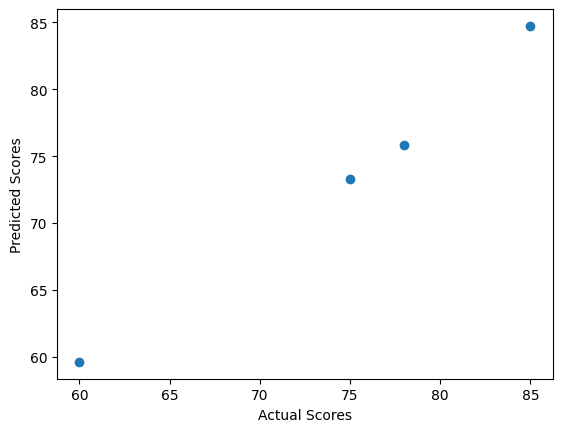

In [85]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predicted)
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')

### Step : 12 Hyperparameters

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
print("Coefficients:", reg.coef_)
print("Intercept:", reg.intercept_)

Coefficients: [1.79234813 2.7099077  6.02653628 1.56461861]
Intercept: [73.565358]


In [88]:
# Gradient Descent notebook ke END mein add karen

# Model save karne ka code
import pickle
from sklearn.preprocessing import StandardScaler

# 1. Model save karo
with open('student_model.pkl', 'wb') as f:
    pickle.dump(reg, f)

# 2. Scaler save karo (important!)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# 3. Data statistics save karo (for validation)
data_stats = {
    'features': ['Hours_Studied', 'Attendance', 'Past_Score', 'Sleep_Hours'],
    'mean': x.mean().tolist(),
    'std': x.std().tolist()
}

import json
with open('data_stats.json', 'w') as f:
    json.dump(data_stats, f)

print("✅ Model, Scaler aur Statistics save ho gaye!")

✅ Model, Scaler aur Statistics save ho gaye!
